In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data.

In [18]:
data_path = 'Dataset/Admission_Predict_Ver1.1.csv'

admissions = pd.read_csv(data_path)

### One hot encoding
Here we have some categorical variables like University Rankig and Research. To include these in our model, we'll need to make binary dummy variables (or do one-hot encoding). This is simple to do with Pandas thanks to `get_dummies()`.

In [21]:
one_hot_admissions = admissions[:]


to_be_dropped = ['Serial No.']
one_hot_admissions = one_hot_admissions.drop(to_be_dropped, axis=1)
one_hot_admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Normalizing the variables
We could normalize variables like GRE, TOEFL, SOP, LOR and CGPA

In [26]:
x_data = one_hot_admissions.drop(['Chance of Admit '],axis = 1)

y = one_hot_admissions['Chance of Admit '].values

x_data = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

### Splitting the data into training, testing, and validation sets

We'll save the data for the last approximately 10% to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual percentage of admissions.

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y,test_size = 0.20,random_state = 42)

### Splitting the data into features and targets

## Finally we have prepared our data. Now it's time to train it with neural nets !!! 

In [28]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

model = Sequential()
model.add(Dense(12,input_dim = 7, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))
model.summary()
model.compile(loss = 'mse', optimizer= 'adam', metrics = ['mse', 'mae'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [29]:
history = model.fit(x_train, y_train, epochs = 65, batch_size = 50, verbose = 1, validation_split = 0.2)


Train on 320 samples, validate on 80 samples
Epoch 1/65
320/320 [==============================] - 0s 972us/step - loss: 0.6413 - mean_squared_error: 0.6413 - mean_absolute_error: 0.7847 - val_loss: 0.6045 - val_mean_squared_error: 0.6045 - val_mean_absolute_error: 0.7600
Epoch 2/65
320/320 [==============================] - 0s 35us/step - loss: 0.5507 - mean_squared_error: 0.5507 - mean_absolute_error: 0.7269 - val_loss: 0.5190 - val_mean_squared_error: 0.5190 - val_mean_absolute_error: 0.7041
Epoch 3/65
320/320 [==============================] - 0s 40us/step - loss: 0.4768 - mean_squared_error: 0.4768 - mean_absolute_error: 0.6761 - val_loss: 0.4590 - val_mean_squared_error: 0.4590 - val_mean_absolute_error: 0.6616
Epoch 4/65
320/320 [==============================] - 0s 45us/step - loss: 0.4223 - mean_squared_error: 0.4223 - mean_absolute_error: 0.6355 - val_loss: 0.4118 - val_mean_squared_error: 0.4118 - val_mean_absolute_error: 0.6254
Epoch 5/65
320/320 [==========================

Epoch 37/65
320/320 [==============================] - 0s 41us/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0490 - val_loss: 0.0036 - val_mean_squared_error: 0.0036 - val_mean_absolute_error: 0.0401
Epoch 38/65
320/320 [==============================] - 0s 49us/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0488 - val_loss: 0.0036 - val_mean_squared_error: 0.0036 - val_mean_absolute_error: 0.0399
Epoch 39/65
320/320 [==============================] - 0s 51us/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0485 - val_loss: 0.0036 - val_mean_squared_error: 0.0036 - val_mean_absolute_error: 0.0398
Epoch 40/65
320/320 [==============================] - 0s 50us/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0484 - val_loss: 0.0036 - val_mean_squared_error: 0.0036 - val_mean_absolute_error: 0.0398
Epoch 41/65
320/320 [==============================] - 0s 42us/step - loss: 0.0043 - mea

## Evaluating the model


In [30]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train)
print("score: ", score)
print("\n Training Accuracy:", score)
score = model.evaluate(x_test, y_test)
print("score: ", score)
print("\n Testing Accuracy:", score)

400/400 [==============================] - 0s 20us/step
score:  [0.003971906621009111, 0.003971906621009111, 0.04571866795420647]

 Training Accuracy: [0.003971906621009111, 0.003971906621009111, 0.04571866795420647]
100/100 [==============================] - 0s 38us/step
score:  [0.004133456684648991, 0.004133456684648991, 0.04629623532295227]

 Testing Accuracy: [0.004133456684648991, 0.004133456684648991, 0.04629623532295227]


In [33]:
y_pred = model.predict(x_test)

Text(0.5, 1.0, 'Prediction')

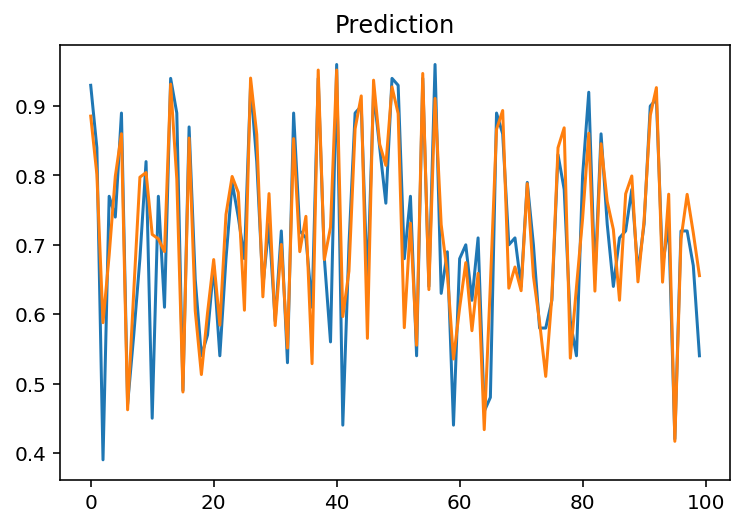

In [34]:
plt.plot(y_test)
plt.plot(y_pred)
plt.title('Prediction')